In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('cardtech_transaction_dump.csv')

C:\Users\Abhishek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

id  card_account ppan  hold_number  merchant_category_code amount_ccy  \
0   1             2  NaN          NaN                     NaN        AUD   
1   2             4  NaN          NaN                     NaN        AUD   
2   3             4  NaN          NaN                     NaN        AUD   
3   4             4  NaN          NaN                     NaN        AUD   
4   5             1  NaN          NaN                     NaN        AUD   

   amount_value                 time   post_date settlement_date  ...  \
0          50.0  2020-02-18 02:48:53  2020-02-17             NaN  ...   
1         100.0  2020-02-18 02:38:11  2020-02-17             NaN  ...   
2         100.0  2020-02-18 02:41:25  2020-02-17             NaN  ...   
3         100.0  2020-02-20 01:49:43  2020-02-19             NaN  ...   
4           2.0  2020-02-21 01:03:51  2020-02-20             NaN  ...   

   interchange_fee_ccy interchange_fee_value approval_code reference_number  \
0                  NaN                   NaN             0              NaN   
1                  NaN                   NaN             0              NaN   
2                  NaN                   NaN             0              NaN   
3                  NaN                   NaN             0              NaN   
4                  NaN                   NaN             0              NaN   

  fees_code fees_description fees_value markup acquirer_id  \
0                                   NaN    0.0         NaN   
1                                   NaN    0.0         NaN   
2                                   NaN    0.0         NaN   
3                                   NaN    0.0         NaN   
4                                   NaN    0.0         NaN   

  network_reference_number  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

[5 rows x 35 columns]

In [4]:
data.shape

(194634, 35)

In [5]:
data.dtypes

id                            int64
card_account                  int64
ppan                         object
hold_number                 float64
merchant_category_code      float64
amount_ccy                   object
amount_value                float64
time                         object
post_date                    object
settlement_date              object
stan                        float64
reference_data               object
type                         object
type_desc                    object
description                  object
merchant_country             object
merchant_id                  object
merchant_terminal            object
point_code                   object
account_ccy_amount_ccy       object
account_ccy_amount_rate     float64
account_ccy_amount_value    float64
settlement_amount_ccy        object
settlement_amount_rate      float64
settlement_amount_value     float64
interchange_fee_ccy          object
interchange_fee_value       float64
approval_code               

In [6]:
data.columns

Index(['id', 'card_account', 'ppan', 'hold_number', 'merchant_category_code',
       'amount_ccy', 'amount_value', 'time', 'post_date', 'settlement_date',
       'stan', 'reference_data', 'type', 'type_desc', 'description',
       'merchant_country', 'merchant_id', 'merchant_terminal', 'point_code',
       'account_ccy_amount_ccy', 'account_ccy_amount_rate',
       'account_ccy_amount_value', 'settlement_amount_ccy',
       'settlement_amount_rate', 'settlement_amount_value',
       'interchange_fee_ccy', 'interchange_fee_value', 'approval_code',
       'reference_number', 'fees_code', 'fees_description', 'fees_value',
       'markup', 'acquirer_id', 'network_reference_number'],
      dtype='object')

<AxesSubplot:>

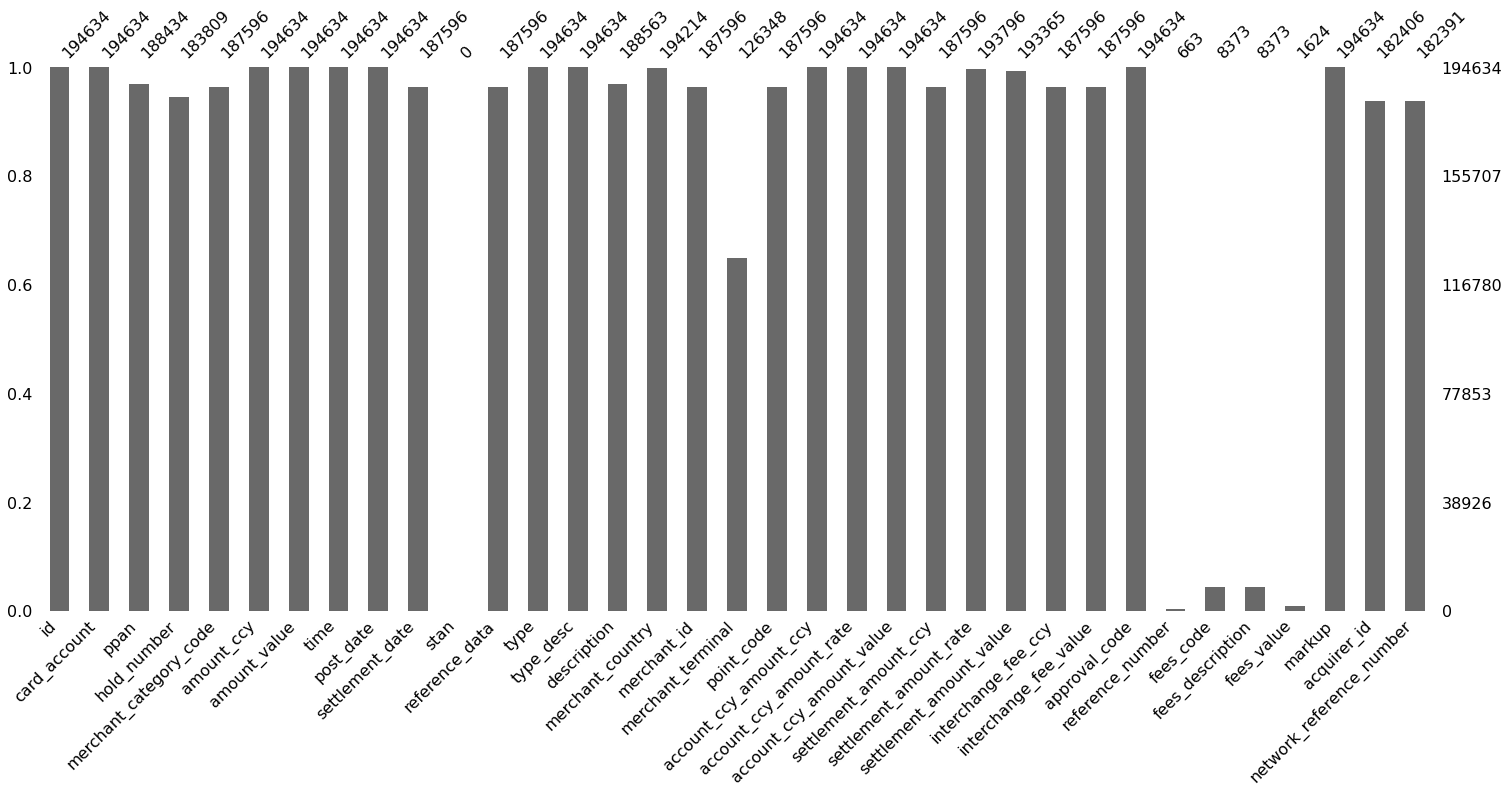

In [7]:
import missingno as msno
msno.bar(data)

In [8]:
data.isnull().sum()

id                               0
card_account                     0
ppan                          6200
hold_number                  10825
merchant_category_code        7038
amount_ccy                       0
amount_value                     0
time                             0
post_date                        0
settlement_date               7038
stan                        194634
reference_data                7038
type                             0
type_desc                        0
description                   6071
merchant_country               420
merchant_id                   7038
merchant_terminal            68286
point_code                    7038
account_ccy_amount_ccy           0
account_ccy_amount_rate          0
account_ccy_amount_value         0
settlement_amount_ccy         7038
settlement_amount_rate         838
settlement_amount_value       1269
interchange_fee_ccy           7038
interchange_fee_value         7038
approval_code                    0
reference_number    

In [9]:
data=data.drop(['id','ppan','description','hold_number','merchant_category_code','settlement_date','merchant_id','reference_data','stan','reference_number', 'fees_code', 'fees_description','point_code', 'fees_value','merchant_terminal','network_reference_number','acquirer_id'], axis = 1)

In [10]:
data.isnull().sum()

card_account                   0
amount_ccy                     0
amount_value                   0
time                           0
post_date                      0
type                           0
type_desc                      0
merchant_country             420
account_ccy_amount_ccy         0
account_ccy_amount_rate        0
account_ccy_amount_value       0
settlement_amount_ccy       7038
settlement_amount_rate       838
settlement_amount_value     1269
interchange_fee_ccy         7038
interchange_fee_value       7038
approval_code                  0
markup                         0
dtype: int64

In [11]:
data.merchant_country.value_counts()

AUS    94043
AU     88674
        6618
US       959
USA      830
       ...  
LVA        1
ID         1
HUN        1
SVK        1
PRT        1
Name: merchant_country, Length: 78, dtype: int64

In [12]:
data.settlement_amount_rate.value_counts()

0.0    193796
Name: settlement_amount_rate, dtype: int64

In [13]:
data.settlement_amount_ccy.value_counts()

AUD    187596
Name: settlement_amount_ccy, dtype: int64

In [14]:
data.interchange_fee_ccy.value_counts()

AUD    187596
Name: interchange_fee_ccy, dtype: int64

In [15]:
data.interchange_fee_value.value_counts()

0.0    187596
Name: interchange_fee_value, dtype: int64

In [16]:
data = data.fillna(data.mode().iloc[0])

In [17]:
data.isnull().sum()

card_account                0
amount_ccy                  0
amount_value                0
time                        0
post_date                   0
type                        0
type_desc                   0
merchant_country            0
account_ccy_amount_ccy      0
account_ccy_amount_rate     0
account_ccy_amount_value    0
settlement_amount_ccy       0
settlement_amount_rate      0
settlement_amount_value     0
interchange_fee_ccy         0
interchange_fee_value       0
approval_code               0
markup                      0
dtype: int64

In [18]:
data.head()

card_account amount_ccy  amount_value                 time   post_date  \
0             2        AUD          50.0  2020-02-18 02:48:53  2020-02-17   
1             4        AUD         100.0  2020-02-18 02:38:11  2020-02-17   
2             4        AUD         100.0  2020-02-18 02:41:25  2020-02-17   
3             4        AUD         100.0  2020-02-20 01:49:43  2020-02-19   
4             1        AUD           2.0  2020-02-21 01:03:51  2020-02-20   

  type            type_desc merchant_country account_ccy_amount_ccy  \
0  110  Cardholder payments              AUS                    AUD   
1  110  Cardholder payments              AUS                    AUD   
2  110  Cardholder payments              AUS                    AUD   
3  12C              Payment              AUS                    AUD   
4  110  Cardholder payments              AUS                    AUD   

   account_ccy_amount_rate  account_ccy_amount_value settlement_amount_ccy  \
0                      0.0                      50.0                   AUD   
1                      0.0                     100.0                   AUD   
2                      0.0                     100.0                   AUD   
3                      0.0                    -100.0                   AUD   
4                      0.0                       2.0                   AUD   

   settlement_amount_rate  settlement_amount_value interchange_fee_ccy  \
0                     0.0                      0.0                 AUD   
1                     0.0                      0.0                 AUD   
2                     0.0                      0.0                 AUD   
3                     0.0                      0.0                 AUD   
4                     0.0                      0.0                 AUD   

   interchange_fee_value approval_code  markup  
0                    0.0             0     0.0  
1                    0.0             0     0.0  
2                    0.0             0     0.0  
3                    0.0             0     0.0  
4                    0.0             0     0.0

In [19]:
data.shape

(194634, 18)

In [20]:
data.amount_ccy.value_counts()

AUD    192019
USD      1947
INR       185
GBP       128
NZD        94
MYR        75
EUR        54
CAD        37
SGD        34
BDT        19
TWD        17
RUB        10
CHF         7
QAR         2
HUF         1
AFN         1
IDR         1
PKR         1
ILS         1
RSD         1
Name: amount_ccy, dtype: int64

In [21]:
data.amount_value.describe()

count    194634.000000
mean        114.737809
std         902.306499
min           0.010000
25%          12.800000
50%          34.990000
75%          90.000000
max      325105.000000
Name: amount_value, dtype: float64

In [22]:
import plotly.express as px
fig = px.histogram(data, x="amount_value")
fig.show()

In [23]:
data['time']= pd.to_datetime(data['time'])

In [24]:
data["hour"]=data['time'].dt.hour

In [25]:
data.head()

card_account amount_ccy  amount_value                time   post_date type  \
0             2        AUD          50.0 2020-02-18 02:48:53  2020-02-17  110   
1             4        AUD         100.0 2020-02-18 02:38:11  2020-02-17  110   
2             4        AUD         100.0 2020-02-18 02:41:25  2020-02-17  110   
3             4        AUD         100.0 2020-02-20 01:49:43  2020-02-19  12C   
4             1        AUD           2.0 2020-02-21 01:03:51  2020-02-20  110   

             type_desc merchant_country account_ccy_amount_ccy  \
0  Cardholder payments              AUS                    AUD   
1  Cardholder payments              AUS                    AUD   
2  Cardholder payments              AUS                    AUD   
3              Payment              AUS                    AUD   
4  Cardholder payments              AUS                    AUD   

   account_ccy_amount_rate  account_ccy_amount_value settlement_amount_ccy  \
0                      0.0                      50.0                   AUD   
1                      0.0                     100.0                   AUD   
2                      0.0                     100.0                   AUD   
3                      0.0                    -100.0                   AUD   
4                      0.0                       2.0                   AUD   

   settlement_amount_rate  settlement_amount_value interchange_fee_ccy  \
0                     0.0                      0.0                 AUD   
1                     0.0                      0.0                 AUD   
2                     0.0                      0.0                 AUD   
3                     0.0                      0.0                 AUD   
4                     0.0                      0.0                 AUD   

   interchange_fee_value approval_code  markup  hour  
0                    0.0             0     0.0     2  
1                    0.0             0     0.0     2  
2                    0.0             0     0.0     2  
3                    0.0             0     0.0     1  
4                    0.0             0     0.0     1

In [26]:
data.hour.value_counts()

0     188569
4        955
12       882
10       730
7        499
3        464
9        348
14       289
2        286
6        276
1        273
11       270
5        258
8        226
13       202
15        46
17        23
23        17
16         9
22         8
18         2
21         2
Name: hour, dtype: int64

In [27]:
data.type_desc.value_counts()

Purchase                182067
Cardholder payments       3675
Credit purchase           3461
Payment                   2525
Cash                      1994
Monthly fee (base)         824
Deposits                    40
Reverse purchase            19
Reverse cash                15
Card replacement fee        14
Name: type_desc, dtype: int64

<AxesSubplot:xlabel='type_desc', ylabel='count'>

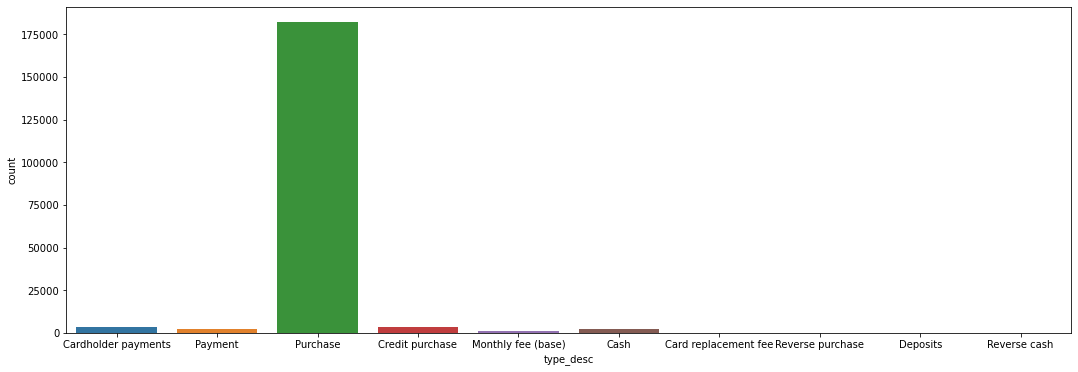

In [28]:
plt.figure(figsize=(18,6))
sns.countplot(x ='type_desc', data = data)

In [29]:
amount = data.groupby('type_desc')['amount_value'].sum()
amount = amount.sort_values(ascending=False)
types_of_transaction = amount[1:11].index

cases = amount[1:11].values 

account_ccy = data.groupby('type_desc')['account_ccy_amount_value'].sum()
deaths = account_ccy[types_of_transaction].values # Number of Deaths in Top 10 Countries

df = pd.DataFrame({'type_desc': types_of_transaction, 'Total amount': cases})
print(df)

              type_desc  Total amount
0               Payment    1969626.64
1   Cardholder payments    1447105.90
2                  Cash    1200605.88
3       Credit purchase     757543.85
4              Deposits      52612.84
5      Reverse purchase      10996.26
6          Reverse cash       6566.30
7    Monthly fee (base)       4051.66
8  Card replacement fee        140.00


Text(0.5, 1.0, 'Types of transaction')

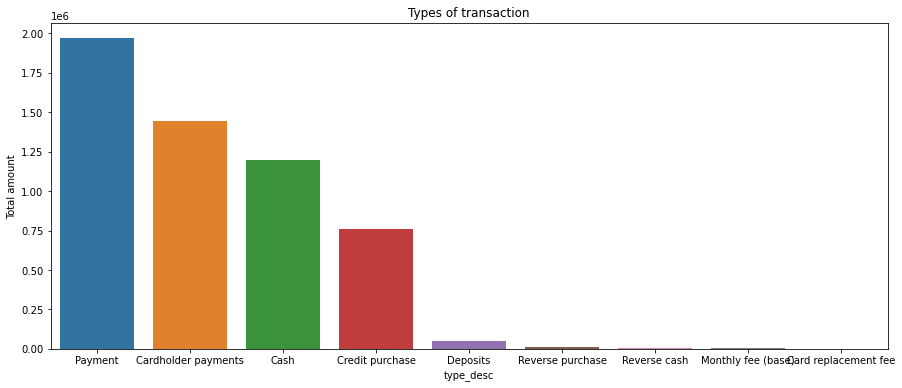

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x="type_desc", y="Total amount", data=df)
plt.title("Types of transaction")

In [31]:
# Encode all the categorical columns
for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

In [32]:
import seaborn as sns
corr=data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

In [33]:
data.shape

(194634, 19)

In [34]:
data.drop_duplicates(keep=False,inplace=True)
data.shape

(194573, 19)

In [35]:
data.set_index("time", inplace = True)

In [36]:
data.head()

card_account  amount_ccy  amount_value  post_date  type  \
time                                                                           
2020-02-18 02:48:53             2           1          50.0          0     0   
2020-02-18 02:38:11             4           1         100.0          0     0   
2020-02-18 02:41:25             4           1         100.0          0     0   
2020-02-20 01:49:43             4           1         100.0          1     1   
2020-02-21 01:03:51             1           1           2.0          2     0   

                     type_desc  merchant_country  account_ccy_amount_ccy  \
time                                                                       
2020-02-18 02:48:53          1                 5                       0   
2020-02-18 02:38:11          1                 5                       0   
2020-02-18 02:41:25          1                 5                       0   
2020-02-20 01:49:43          6                 5                       0   
2020-02-21 01:03:51          1                 5                       0   

                     account_ccy_amount_rate  account_ccy_amount_value  \
time                                                                     
2020-02-18 02:48:53                      0.0                      50.0   
2020-02-18 02:38:11                      0.0                     100.0   
2020-02-18 02:41:25                      0.0                     100.0   
2020-02-20 01:49:43                      0.0                    -100.0   
2020-02-21 01:03:51                      0.0                       2.0   

                     settlement_amount_ccy  settlement_amount_rate  \
time                                                                 
2020-02-18 02:48:53                      0                     0.0   
2020-02-18 02:38:11                      0                     0.0   
2020-02-18 02:41:25                      0                     0.0   
2020-02-20 01:49:43                      0                     0.0   
2020-02-21 01:03:51                      0                     0.0   

                     settlement_amount_value  interchange_fee_ccy  \
time                                                                
2020-02-18 02:48:53                      0.0                    0   
2020-02-18 02:38:11                      0.0                    0   
2020-02-18 02:41:25                      0.0                    0   
2020-02-20 01:49:43                      0.0                    0   
2020-02-21 01:03:51                      0.0                    0   

                     interchange_fee_value  approval_code  markup  hour  
time                                                                     
2020-02-18 02:48:53                    0.0              0     0.0     2  
2020-02-18 02:38:11                    0.0              0     0.0     2  
2020-02-18 02:41:25                    0.0              0     0.0     2  
2020-02-20 01:49:43                    0.0              0     0.0     1  
2020-02-21 01:03:51                    0.0              0     0.0     1

In [37]:
data.hour.value_counts()

0     188508
4        955
12       882
10       730
7        499
3        464
9        348
14       289
2        286
6        276
1        273
11       270
5        258
8        226
13       202
15        46
17        23
23        17
16         9
22         8
18         2
21         2
Name: hour, dtype: int64

# Anomaly detection on hour_category  column

In [38]:
features = data.loc[:, data.columns != 'type_desc']
target= data['type_desc'] 
 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features,target,test_size=0.2, random_state=0)


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
import tensorflow as tf


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.metrics import accuracy_score


In [41]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [42]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (155658, 1, 17)
Test data shape: (38915, 1, 17)


In [43]:
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

history = model.fit(
    X_train,
    X_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_test, X_test)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 17)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             2176      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

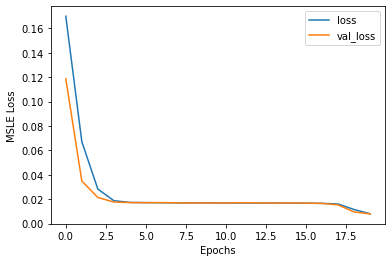

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [45]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)

In [46]:
X_pred.shape

(155658, 1, 17)

In [47]:
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

In [48]:
_train, _test, train_y, test_y= train_test_split(features,target,test_size=0.2, random_state=42)

In [49]:
_train.shape

(155658, 17)

In [50]:
X_pred = pd.DataFrame(X_pred, columns=_train.columns)

In [51]:
X_pred.index = _train.index

In [52]:
scored = pd.DataFrame(index=_train.index)


In [53]:
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])

In [54]:
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)

In [55]:
scored.head()

Loss_mae
time                
2021-01-08  0.037455
2021-10-20  0.003680
2021-06-23  0.001394
2021-03-07  0.009515
2020-09-07  0.004111

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(0.0, 0.5)

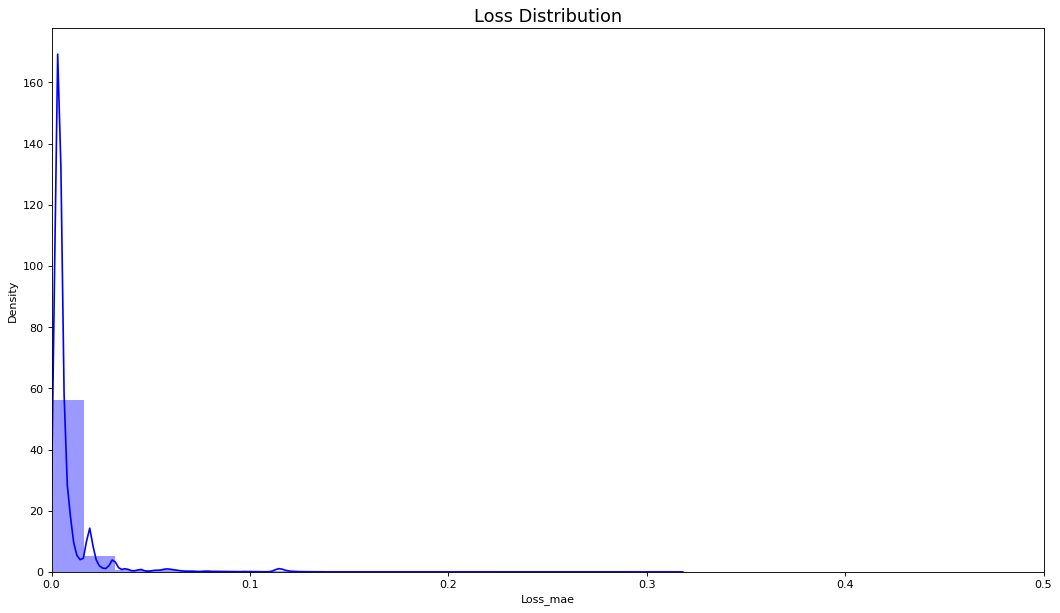

In [56]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [57]:
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=_test.columns)
X_pred.index = _test.index

scored = pd.DataFrame(index=_test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.1
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

Loss_mae  Threshold  Anomaly
time                                    
2021-08-06  0.002967        0.1    False
2020-10-27  0.003945        0.1    False
2021-08-12  0.004331        0.1    False
2020-11-09  0.002906        0.1    False
2020-11-13  0.003745        0.1    False

In [58]:
scored.Anomaly.value_counts()

False    38630
True       285
Name: Anomaly, dtype: int64